# Probability and Bayes Theorem 
Probability is a measure of the likelihood or chance of a particular event or a parameter value of occurring. It quantifies uncertainty and helps us make prediction and informed decisions based on the likelihood of various outcomes. 

Bayes Theorem is a powerful tool in probability and statistics for updating the probability of a hypothesis based on new evidence. It is widely used in various fields such as medical diagnosis, machine learning, and data analysis. The theorem is stated as follows

$P(A∣B)= \frac{P(B∣A)⋅P(A)}{P(B)}$

where: 

$​P(A∣B)$ is the posterior probability: the probability of hypothesis $A$ given the evidence $B$.

$​P(B∣A)$ is the likelihood: the probability of evidence $B$ given that hypothesis $A$ is true.

$P(A)$ is the prior probability: the initial probability of hypothesis $A$ before seeing the evidence.

$P(B)$ is the marginal likelihood: the total probability of the evidence under all possible hypotheses.


For the example below, we create two probability distribution and joint them together.


Area under joint PDF: 0.4014155725191563
Area under joint PDF: 1.0035389312978906


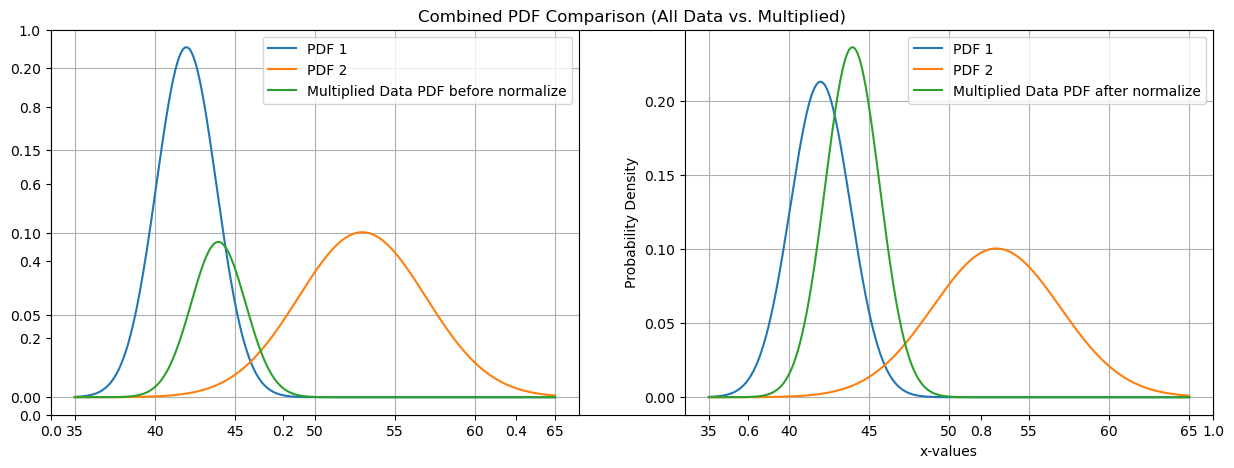

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm 

# Generate data with specific mean and standard deviation 
np.random.seed(10)
x1 = np.random.normal(42, 2, 1000)
x2 = np.random.normal(53, 4, 1000)

# Calculate means and standard deviation for the generated data
mean1 = np.mean(x1)
mean2 = np.mean(x2)
std1 = np.std(x1)
std2 = np.std(x2)

# Create x values for plotting the PDF
x_values = np.linspace(35 , 65 , 1000)

# Calculate PDF values for both datasets
pdf_values1 = norm.pdf(x_values, loc = mean1, scale = std1)
pdf_values2 = norm.pdf(x_values, loc = mean2, scale = std2)

# Multiplied the PDFs of the two datasets and scale by 100
pdf_combined = np.zeros_like(pdf_values1)
for i in range(len(pdf_values1)): 
  pdf_combined[i] = (pdf_values1[i] * pdf_values2[i]) * 100
pdf_combined = pdf_values1 * pdf_values2 * 100

# Define a function to calculate the normal PDF
def normal_pdf(x, mean, std):
  return (1 / (std * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std**2))

# Calculate the PDF values using the defined function
y_values1 = normal_pdf(x_values, mean1, std1)
y_values2 = normal_pdf(x_values, mean2, std2)

# Calculate area under the curve 
area = np.trapz(pdf_combined, x_values)
print(f"Area under joint PDF:", area)

# Normalize the are under the curve
normalize_area = np.trapz(pdf_combined * 2.5 , x_values)
print(f"Area under joint PDF:",normalize_area)

plt.figure(figsize=(15, 5))

# Plot the joint distribution before normalize area under the curve
plt.title('Combined PDF Comparison (All Data vs. Multiplied)')
plt.subplot(1, 2, 1)  
plt.plot(x_values, pdf_values1, label = 'PDF 1')
plt.plot(x_values, pdf_values2, label = 'PDF 2')
plt.plot(x_values, pdf_combined, label='Multiplied Data PDF before normalize')
plt.grid(True)
plt.legend()

# Plot the joint distribution after normalize area under the curve
plt.subplot(1, 2, 2)  
plt.plot(x_values, pdf_values1, label = 'PDF 1')
plt.plot(x_values, pdf_values2, label = 'PDF 2')
plt.plot(x_values, pdf_combined  * 2.5, label='Multiplied Data PDF after normalize')
plt.xlabel('x-values')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()


plt.show()

By multiplying two distribution together you get a joint distribution. We can also see where two distribution are both likely to occur, which can show as $P(A \cap B)$. 

One thing we have to consider when you calculate a joint distribution, the area under the curve of a normal distribution is a probability distribution that represents the likelihood of variables falling within a specific range of values. The total area under the curve is always equal to 1, or 100%. As the code above we already normalize the area under curve. We want to show specifically how to do it. 

We only get area under the curve is 0.4 for the joint distribution at the first graph, we have to normalize the area to be able to be equal to 1. We have to multiply 2.5 to get area under the curve equal 1 as shown as graph two after normalize it.

In [23]:
# Given data point (parameter value)
value = 50

# Calculate the likelihood using PDFs
likelihood_H1 = norm.pdf(value, loc = mean1, scale = std1)
likelihood_H2 = norm.pdf(value, loc = mean2, scale = std2)

# Assume equal priors for both hypotheses
prior_H1 = 0.5
prior_H2 = 0.5

# Calculate the marginal likelihood (total probability of the parameter value)
marginal_likelihood = likelihood_H1 * prior_H1 + likelihood_H2 * prior_H2

# Calculate the posterior probabilities using Bayes' Theorem
posterior_H1 = (likelihood_H1 * prior_H1) / marginal_likelihood
posterior_H2 = (likelihood_H2 * prior_H2) / marginal_likelihood

# Print the posterior 
print(f"Posterior probability of H1 given the parameter value: {posterior_H1}")
print(f"Posterior probability of H2 given the parameter value: {posterior_H2}")

Posterior probability of H1 given the parameter value: 0.000293946727947517
Posterior probability of H2 given the parameter value: 0.9997060532720524


For the example above, using Bayes Theorem $P(H_1∣H_2)= \frac{P(H_2∣H_1)⋅P(H_1)}{P(H_2)}$ to calculate the likelihood of the two normal distribution given the parameter value at 50. 

After applying Bayes' theorem, we find that the posterior probability of hypothesis $H_2$ is significantly higher than that of $H_1$ given the parameter value.

In the plotted graph, the orange curve representing $H_2$'s distribution shows its mean (center) closer to the parameter value point $x=50$. On the other hand, the blue curve representing $H_1$'s distribution has its mean farther away from $x = 50$. 

By applying Bayes' Theorem, we can assess how the observed parameter value updates out prior beliefs about which hypothesis ($H_1$ or $H_2$) is more likely, based on how closely their distribution align with the observed data point $x=50$

## Credible interval 

A credible interval is a concept from Bayesian statistic that represent an interval within which an unknown parameter (such as the mean of a distribution) lies with a certain probability. Credible intervals are widely used in fields that apply Bayesian statistic, such as machine learning, genetics, and certain areas of social science and medicine, where prior knowledge and updating of beliefs based on new data are crucial. 

We can generate some random data around the coefficient

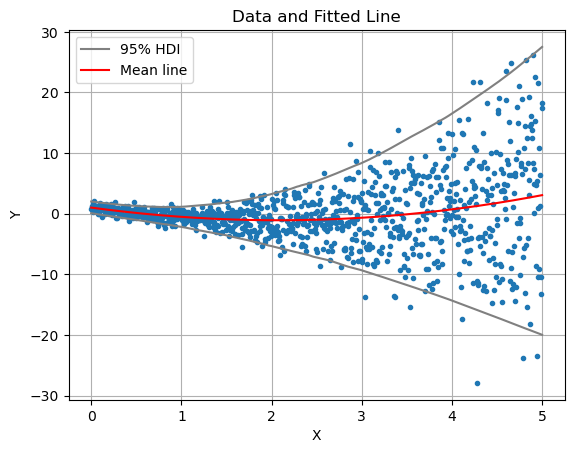

In [33]:
np.random.seed(15)

# Generate new x values
X = np.linspace(0, 5, 1000)

# Generate random data base on the coefficients from above 
a = np.random.normal(0.5, 0.5, 1000)
b = np.random.normal(-2, 0.5, 1000)
c = np.random.normal(1, 0.5, 1000)

# Generate new Y values 
Y = a*X**2 + b*X + c 
plt.plot(X, Y, '.')
bound1 = []
upper_bound = []
lower_bound = [] 

# Calculate the 95% high density 
for i in range(len(X)): 
    y_values = a * X[i] ** 2 + b * X[i] + c
    bound1.append(y_values)
    lower_bound.append(np.percentile(y_values, 2.5))
    upper_bound.append(np.percentile(y_values, 97.5))

plt.plot(X, lower_bound,color='gray',alpha = 1, label = '95% HDI')
plt.plot(X, upper_bound, color='gray',alpha = 1)

# Create mean line  
bound1 = np.array(bound1)
mean_line = np.mean(bound1, axis = 1)

# Create a lower and upper bound for each coefficient (95% HDI)    
a_lower = np.percentile(a, 2.5)
a_upper = np.percentile(a, 97.5)
b_lower = np.percentile(b, 2.5)
b_upper = np.percentile(b, 97.5)
c_lower = np.percentile(c, 2.5)
c_upper = np.percentile(c, 97.5)

# Draw a 95% HDI for the equation 
percentile1 = np.percentile(lower_bound, 2.5)
percentile2 = np.percentile(upper_bound, 97.5)
plt.plot(X, mean_line, color='red', label='Mean line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Fitted Line')
plt.legend()
plt.grid(True)

plt.show()

The code generates histograms and probability density functions (PDFs) for three sets of data representing coefficients a, b, and c. Additionally, it highlights the 95% Highest Density Interval (HDI) for each coefficient. The HDI is a range within which 95% of the data points lie, providing an interval estimate of where most values of the coefficient are likely to be found.

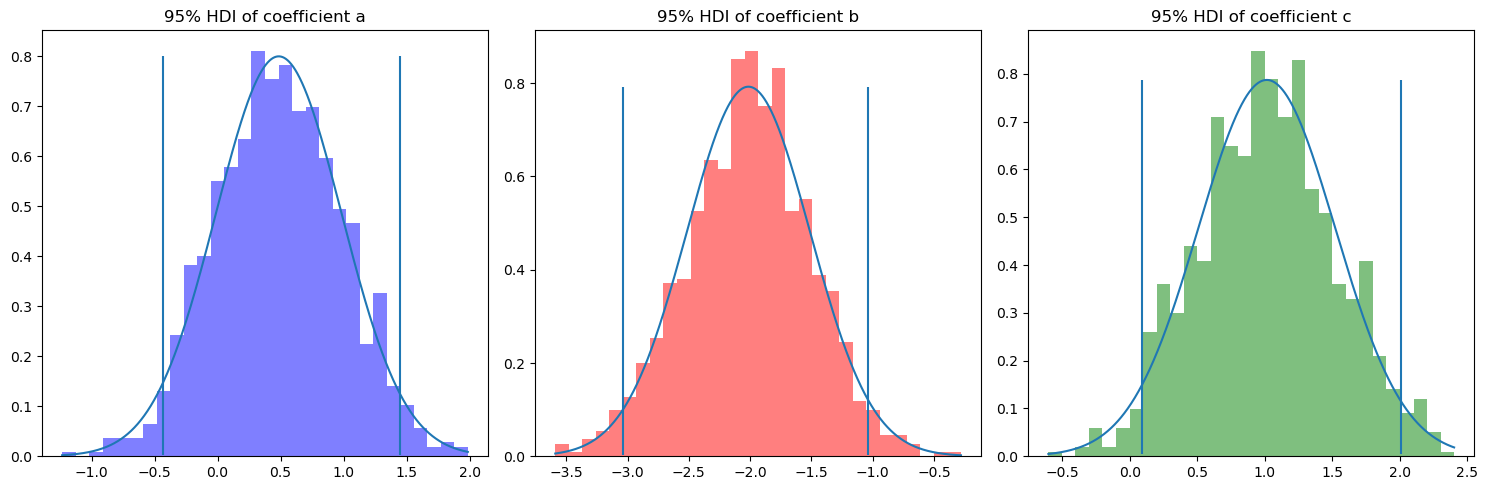

In [25]:
# Set up the plotting area with a 1x3 grid of subplots
plt.figure(figsize=(15, 5))

# Plot for coefficient a
plt.subplot(1,3,1)
x_a = np.linspace(np.min(a), np.max(a), 1000)
pdf_a = norm.pdf(x_a, loc = np.mean(a), scale = np.std(a))
plt.hist(a, density= True, bins = 30, alpha = 0.5, color = 'blue')
plt.plot(x_a, pdf_a)
plt.title('95% HDI of coefficient a')
plt.vlines(a_lower, pdf_a.min(),pdf_a.max())
plt.vlines(a_upper, pdf_a.min(),pdf_a.max())

# Plot for coefficient b
plt.subplot(1,3,2)
x_b = np.linspace(np.min(b), np.max(b), 1000)
pdf_b = norm.pdf(x_b, loc = np.mean(b), scale = np.std(b))
plt.hist(b, density= True, bins = 30, alpha = 0.5, color = 'red')
plt.plot(x_b, pdf_b)
plt.title('95% HDI of coefficient b')
plt.vlines(b_lower, pdf_b.min(),pdf_b.max())
plt.vlines(b_upper, pdf_b.min(),pdf_b.max())

# Plot for coefficient c
plt.subplot(1,3,3)
x_c = np.linspace(np.min(c), np.max(c), 1000)
pdf_c = norm.pdf(x_c, loc = np.mean(c), scale = np.std(c))
plt.hist(c, density= True, bins = 30, alpha = 0.5, color = 'green')
plt.plot(x_c, pdf_c)
plt.title('95% HDI of coefficient c')
plt.vlines(c_lower, pdf_c.min(),pdf_c.max())
plt.vlines(c_upper, pdf_c.min(),pdf_c.max())

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()
